In [ ]:
import ROOT

In [2]:
import uproot
import numpy as np
from array import array
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets
import pandas as pd

In [6]:
# Open the ROOT file
filename = "/global/cfs/cdirs/dune/www/data/2x2/simulation/productions/MiniRun5_1E19_RHC/MiniRun5_1E19_RHC.caf.beta1/CAF.flat/0000000/MiniRun5_1E19_RHC.caf.0000999.CAF.flat.root"
caf_file = uproot.open(filename)
trees = caf_file.keys()
drop_down_tree = widgets.Dropdown(options=trees,
                                description='Tree:',
                                disabled=False,
                                layout={'width': 'max-content'})
drop_down_tree

Dropdown(description='Select tree:', layout=Layout(width='max-content'), options=('cafTree;1', 'globalTree;1',…

In [10]:
# Access the TTree
caf_tree = caf_file[drop_down_tree.value]
branches = caf_tree.keys() 
drop_down_branch = widgets.Dropdown(options=branches,
                                description='Branch:',
                                disabled=False)
drop_down_branch

Dropdown(description='Branch:', options=('rec.beam.deltapulsetimensec', 'rec.beam.gpspulsetimensec', 'rec.beam…

In [11]:
# Create an empty dictionary to store branch data
caf_data_dict = {}

In [38]:
# Iterate over the branch names in the TTree
for branch_name in branches:
    # Use branch_name as the key and fetch the data using .array()
    caf_data_dict[branch_name] = caf_tree[branch_name].array(library="np")

In [12]:
# Create a Pandas DataFrame from the dictionary
df = pd.DataFrame(caf_data_dict)

In [42]:
#unpack reco vertex x
flattened_data_reco = df['rec.common.ixn.dlp.vtx.x'].apply(lambda x: [val for val in x if not np.isnan(val)]).tolist()
flattened_data_reco = [val for sublist in flattened_data_reco for val in sublist]

In [43]:
#unpack truth vertex x
flattened_data_truth = df['rec.mc.nu.vtx.x'].apply(lambda x: [val for val in x if not np.isnan(val)]).tolist()
flattened_data_truth = [val for sublist in flattened_data_truth for val in sublist]

Text(0.5, 0, 'Interaction vertex x [cm]')

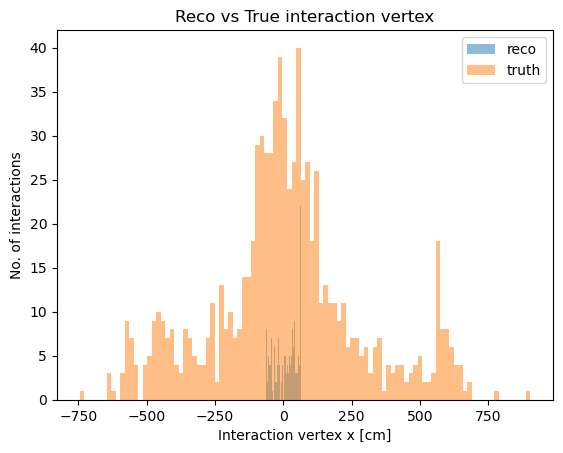

In [47]:
plt.hist(flattened_data_reco, bins=100, alpha=0.5, label = 'reco')
plt.hist(flattened_data_truth, bins=100, alpha=0.5, label='truth')
plt.legend()
plt.title('Reco vs True interaction vertex')
plt.ylabel('No. of interactions')
plt.xlabel('Interaction vertex x [cm]')